<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 2

**Median value of owner-occupied homes boxplot**

<AxesSubplot:xlabel='MEDV'>

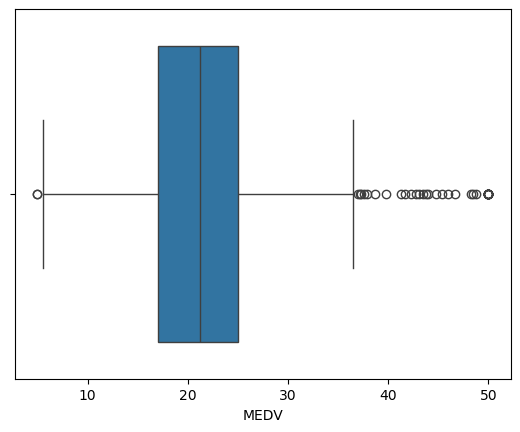

In [7]:
sns.boxplot(x=boston_df['MEDV'])

**Bar plot for Charles river variable**

<AxesSubplot:xlabel='CHAS', ylabel='count'>

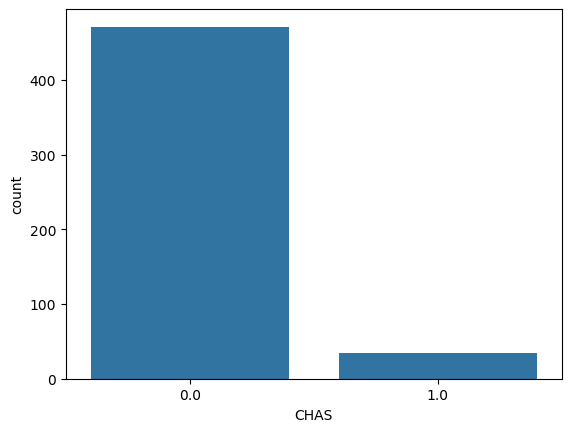

In [8]:
sns.countplot(x = boston_df['CHAS'])

**Boxplot for the MEDV variable vs the AGE variable**

In [9]:
boston_df[['MEDV', 'AGE']]

,MEDV,AGE
0,24.0,65.2
1,21.6,78.9
2,34.7,61.1
3,33.4,45.8
4,36.2,54.2
...,...,...
501,22.4,69.1
502,20.6,76.7
503,23.9,91.0
504,22.0,89.3


<AxesSubplot:xlabel='MEDV', ylabel='AGE_G'>

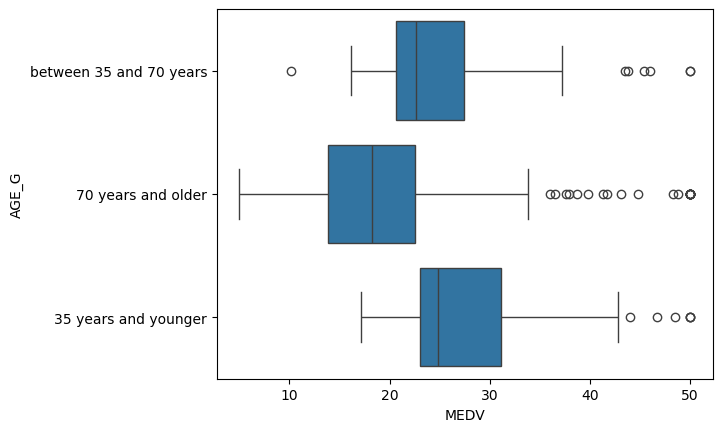

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_G'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_G'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'AGE_G'] = '70 years and older'

sns.boxplot(data=boston_df, x='MEDV', y='AGE_G')

**Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town**

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

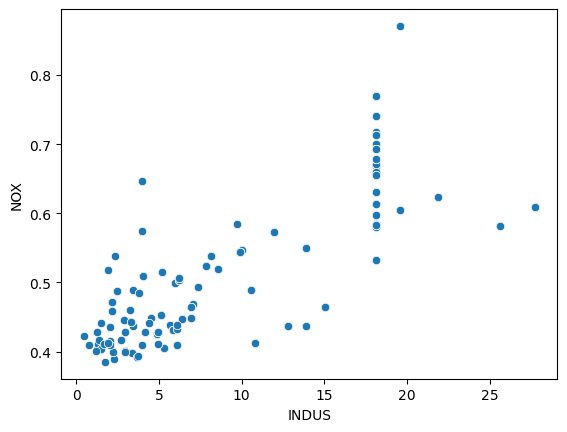

In [12]:
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

According to the scatter plot, we can see that there is a mild/moderately strong positive linear correlation between NOX and INDUS; however, there are some dispersions with the higher values.

**Histogram for the pupil to teacher ratio variable**

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

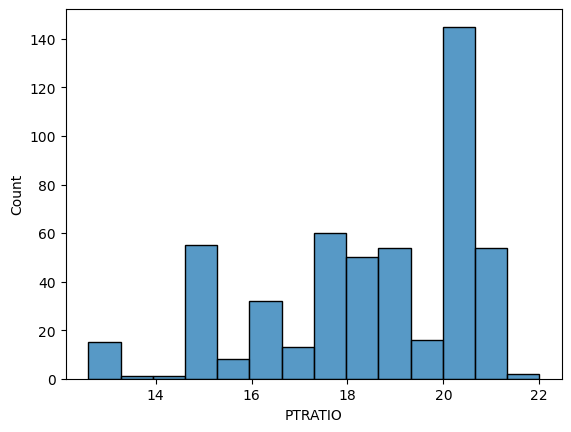

In [13]:
sns.histplot(x=boston_df['PTRATIO'])

#### Task 3

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

**Null hypothesis**: The mean MEDV of houses bounded by the Charles river is equal to that of the houses not bounded by the Charles river.<br>
**Alternative hypothesis**: The mean MEDV of houses bounded by the Charles river is different from that of the houses not bounded by the Charles river.

In this study, we will use alpha with the value of 0.05.

In [14]:
near_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_near_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stats, p_value = scipy.stats.ttest_ind(near_river, not_near_river, equal_var=False)
print('T-statistic:', t_stats)
print('P-value:', p_value)

T-statistic: 3.113291312794837
P-value: 0.003567170098137517


Since our p-value is smaller than 0.05, we will reject the null hypothesis. This means there is a statistically difference in mean MEDV of houses bounded by the Charles river and houses that are not at 5% significance level.

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

**Null hypothesis**: The mean MEDV is the same accross all age groups<br>
**Alternative hypothesis**: At least one of the age group's MEDV is different<br>
**Significance level** = 0.05

In [15]:
below_thirty_five = boston_df[boston_df['AGE_G'] == '35 years and younger']['MEDV']
between_thirty_five_and_seventy = boston_df[boston_df['AGE_G'] == 'between 35 and 70 years']['MEDV']
above_seventy = boston_df[boston_df['AGE_G'] == '70 years and older']['MEDV']

f_stats, p_value = scipy.stats.f_oneway(below_thirty_five, between_thirty_five_and_seventy, above_seventy)
print('F-statistics:', f_stats)
print('P-value:', p_value)

F-statistics: 36.40764999196599
P-value: 1.7105011022702984e-15


In conclusion, at the significance level of 5%, the mean between all of the age groups are statistically different since the p-value is smaller than 0.05.

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

**Null hypothesis**: There is no relationship between NOX and INDUS<br>
**Alternative hypothesis**: There is a relationship between NOX and INDUS<br>
**Significance level** = 0.05

In [19]:
corr_coef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print('Correlation Coefficient:', corr_coef)
print('P-value:', p_value)

Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


Since our correlation coefficient is pretty high (0.76) and our p-value < 0.05, we can conclude that there is a strong relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

**Null hypothesis**: DIS has no impact on MEDV<br>
**Alternative hypothesis**: DIS has an impact on MEDV<br>
**Significance level** = 0.05

In [20]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        23:39:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results:
- DIS coefficient = 1.09
    - For each unit of weighted distances to five Boston employment centres, there is an increase of $1.09k in median value of owner-occupied home
- P > |t| = 0.000
    - Since p-value < 0.05, we reject he null hypothesis
    - We can conclude that the additional weighted distance to the five Boston employment centers impact on the median value of owner-occupied homes is statically significant.

In short, we can conclude that the distance to the five Boston employment centers on the median value of owner-occupied homes has a significant positive relationship.